3. Write a function `my_nearest_neighbour(x, y, X)` where `x` and `y` are arrays that contain experimental data points, and `X` is an array. Assume that `x` and `X` are in ascending order and have unique elements. The output argument, `Y`, should be an array the same size as `X`, where `Y[i]` is the nearest neighbour interpolation of `X[i]`. That is, `Y[i]` should be the `y[j]` where `x[j]` is the closest independent data point of `X[i]`. Do not use `interpld` from `SciPy`.

In [1]:
import numpy as np

def my_nearest_neighbour(x, y, X):
    Y = np.zeros_like(X, dtype = float)

    for i, X_i in enumerate(X):
        nearest_idx = np.argmin(np.abs(x - X_i))
        Y[i] = y[nearest_idx]

    return Y


x = np.array([1, 3, 5, 7, 9])
y = np.array([10, 30, 50, 70, 90])

X = np.array([2, 4, 6, 8])

Y = my_nearest_neighbour(x, y, X)
print("Interpolated values:", Y)

Interpolated values: [10. 30. 50. 70.]


7. Write a function `my_interp_plotter(x, y, X, option)` where `x` and `y` are arrays containing experimental datapoints, and `X` is an array that contains the coordinates for which an interpolation is desired. The input argument option should be a string, either "linear," "spline," or "nearest". Your function should produce a plot of the data points $(x, y)$ marked as red circle. The points $(X,Y)$ should be connected by a blue line. Be sure to include the title, axis labels, and a legend.

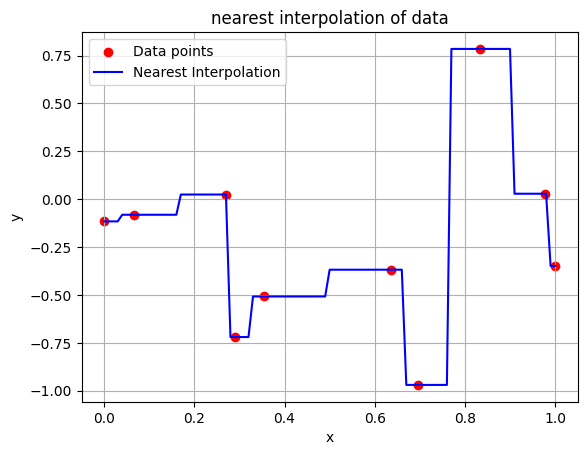

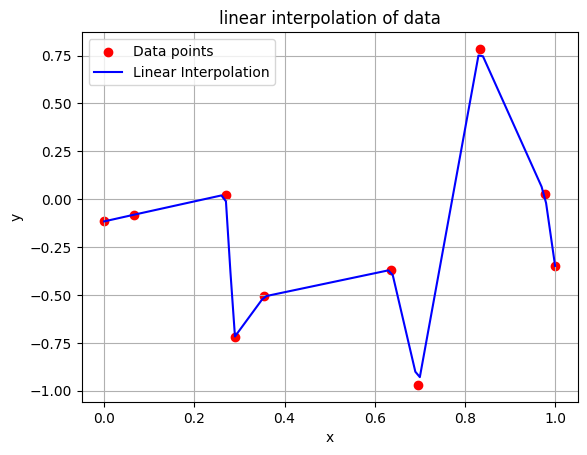

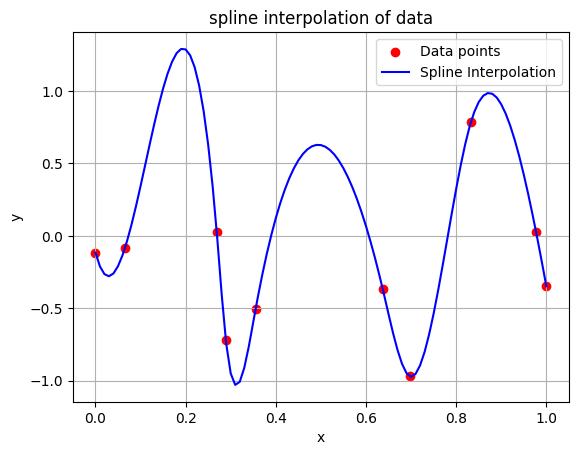

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def my_interp_plotter(x, y, X, option):
    if option not in ["linear", "spline", "nearest"]:
        raise ValueError("Invalid option. Choose from 'linear', 'spline', or 'nearest'.")

    kind = "cubic" if option == "spline" else option 
    interp_func = interp1d(x, y, kind=kind, fill_value="extrapolate")

    Y = interp_func(X)

    plt.scatter(x, y, color="red", label="Data points", marker="o")

    plt.plot(X, Y, color="blue", label=f"{option.capitalize()} Interpolation", linestyle="-")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{option} interpolation of data")
    plt.legend()
    plt.grid(True)

    plt.show()

x = np.random.uniform(0, 1, 8)
x = np.concatenate(([0], x, [1]))
y = np.random.uniform(-1, 1, 10)

X = np.linspace(0, 1, 101)

my_interp_plotter(x, y, X, "nearest")
my_interp_plotter(x, y, X, "linear")
my_interp_plotter(x, y, X, "spline")

8. Write a function `my_D_cubic_spline(x, y, X, D)`, where the output `Y` is the cubic spline interpolation at `X` taken from the datapoints contained in `x` and `y`. Instead of the standard pinned endpoint condition (i.e., $S_{1}''(x_{1}) = 0$ and $S_{n-1}''(x_{n})=0$), use the endpoint conditions $S_{1}'(x_{1}) = D$ and $S_{n-1}'(x_{n})=D$.

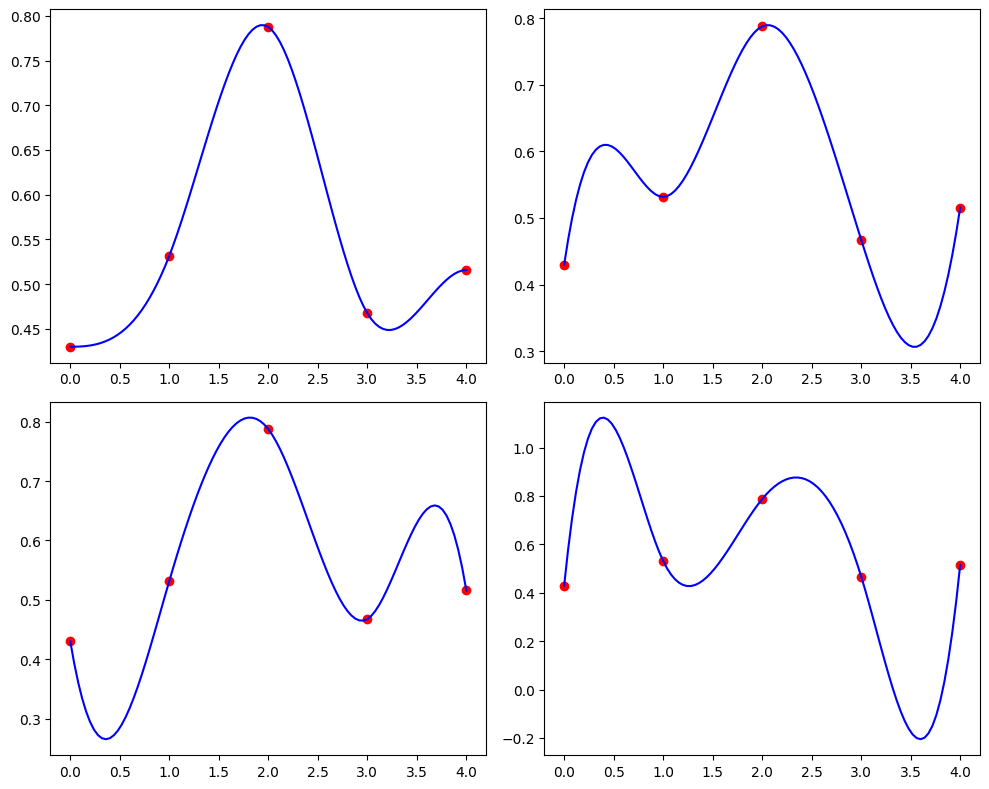

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def my_D_cubic_spline(x, y, X, D):

    spline = CubicSpline(x, y, bc_type=((1, D), (1, D)))
    Y = spline(X)

    return Y

x = np.array([0, 1, 2, 3, 4])
y = np.random.uniform(0, 1, 5)
X = np.linspace(0, 4, 101)

Y = my_D_cubic_spline(x, y, 1.5, 1)

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 0), "b")
plt.subplot(222)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 1), "b")
plt.subplot(223)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, -1), "b")
plt.subplot(224)
plt.plot(x, y, "ro", X, my_D_cubic_spline(x, y, X, 4), "b")
plt.tight_layout()
plt.show()